In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset_diabetes_classification = '../data/external/Diabetes_Classification.xlsx'
dataset_diabetes_prediction = ('../data/external/diabetes_prediction_dataset.csv')

pd_diabetes_classification = pd.read_excel(dataset_diabetes_classification)
pd_diabetes_prediction = pd.read_csv(dataset_diabetes_prediction)

In [6]:
pd_diabetes_classification.head(5)

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,6.0,6.0
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,NaN,NaN
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,NaN,NaN
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,NaN,NaN
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,NaN,NaN


In [9]:
pd_diabetes_classification.shape

(390, 18)

<Axes: xlabel='Gender', ylabel='Age'>

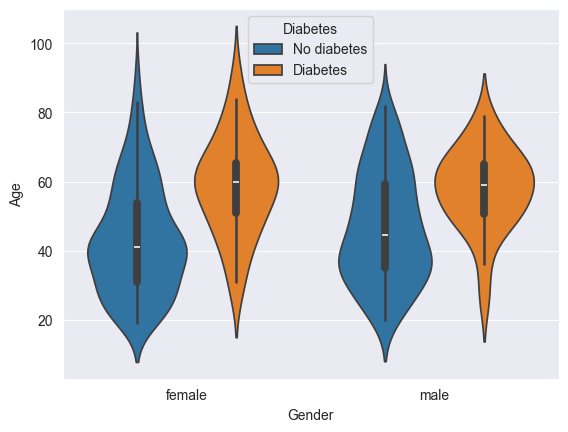

In [11]:
sns.violinplot(pd_diabetes_classification, x='Gender', y='Age', hue='Diabetes')

<Axes: xlabel='Diabetes', ylabel='Cholesterol'>

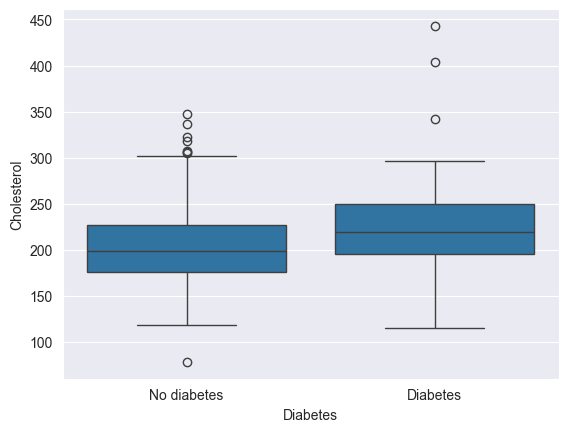

In [12]:
sns.boxplot(pd_diabetes_classification, x='Diabetes', y='Cholesterol')

<Axes: xlabel='Diabetes', ylabel='Glucose'>

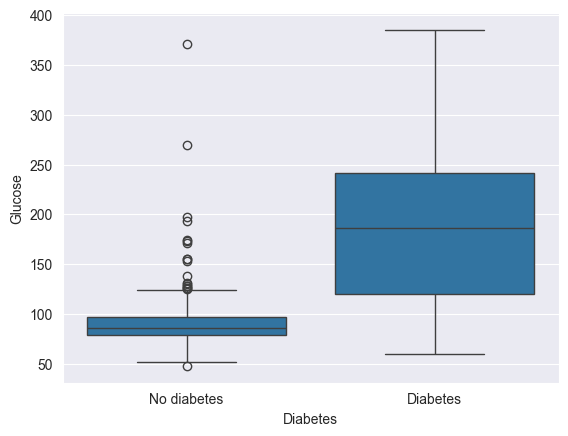

In [13]:
sns.boxplot(pd_diabetes_classification, x='Diabetes', y='Glucose')

In [27]:
from sklearn.cluster import KMeans 
import numpy as np

In [18]:
pd_diabetes_classification.Gender = pd_diabetes_classification['Gender'].apply(lambda x: 1 if x == "female" else 0)

In [19]:
pd_diabetes_classification.Diabetes = pd_diabetes_classification['Diabetes'].apply(lambda x: 0 if x == 'No diabetes' else 1)

In [20]:
pd_diabetes_classification.head(1)

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
0,1,193,77,49,3.9,19,1,61,119,22.5,118,70,32,38,0.84,0,6.0,6.0


In [25]:
pd_diabetes_classification = pd_diabetes_classification.drop("Unnamed: 16", axis=1)
pd_diabetes_classification = pd_diabetes_classification.drop("Unnamed: 17", axis=1)

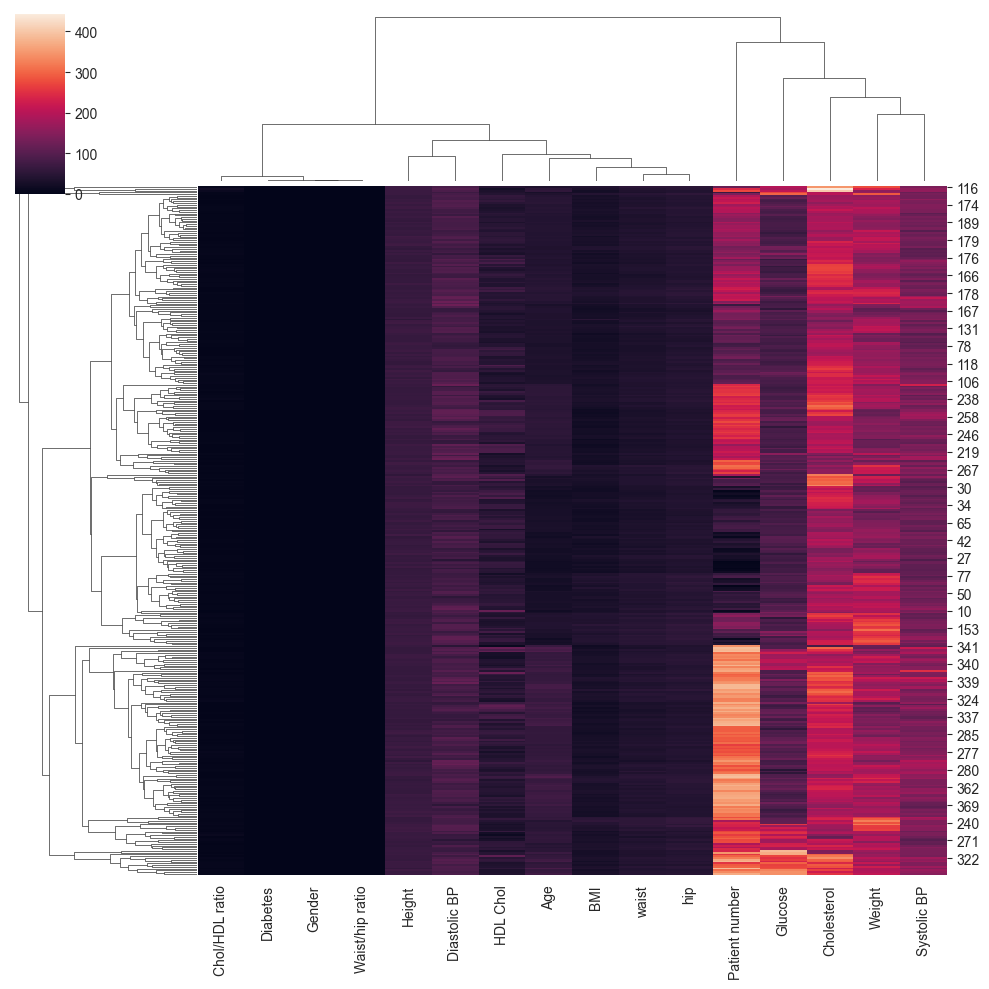

In [26]:
sns.clustermap(pd_diabetes_classification)

In [28]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pd_diabetes_classification) 
    wcss.append(kmeans.inertia_)

<Axes: >

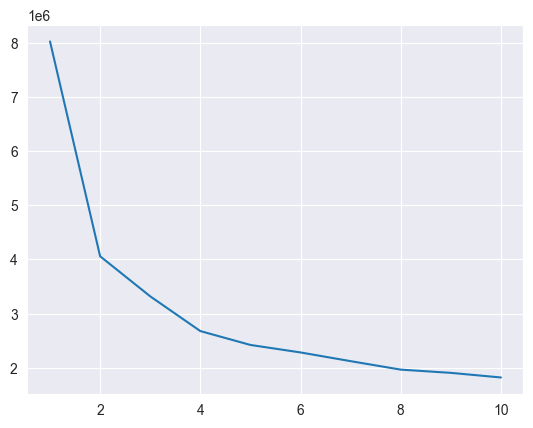

In [29]:
ks= [i for i in range(1,11)]
sns.lineplot(x=ks, y= wcss) 


In [30]:
pd_diabetes_classification.columns


Index(['Patient number', 'Cholesterol', 'Glucose', 'HDL Chol',
       'Chol/HDL ratio', 'Age', 'Gender', 'Height', 'Weight', 'BMI',
       'Systolic BP', 'Diastolic BP', 'waist', 'hip', 'Waist/hip ratio',
       'Diabetes'],
      dtype='object')